# Machine Learning for Regression


## Section 1: data Preparatation

In [3]:
import numpy as np
import pandas as pd


In [4]:
# Import download
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv'


In [5]:
!wget $data # Downloading the data  

--2025-05-20 04:00:45--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1.41M  --.-KB/s    in 0.02s   

2025-05-20 04:00:45 (86.0 MB/s) - ‘data.csv.1’ saved [1475504/1475504]



In [6]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


 The data is of car and their prices!

In [7]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [8]:
print(f'The target variable that we want to predict of a car is {df.MSRP}')

The target variable that we want to predict of a car is 0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: MSRP, Length: 11914, dtype: int64


We see that the data frame and the columns are not fully prepared, specifically some names of the data columns seem to have inconsistent formatting. We clean them up in this part of the preparation workflow. 

In [9]:
df.columns = df.columns.str.lower().str.replace(' ', '_') #lower the column names, replace the spaces with underscore

In [10]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


We now have cleaner column names but we would still face similar problems exploring the name objects within the dataset. Therefore, we could do a similar clearning on the data entries themselves.

In [11]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [12]:
# we are interested in objects which suggests discrete data of strings, names, and so on


In [13]:
df.dtypes == 'object'

make                  True
model                 True
year                 False
engine_fuel_type      True
engine_hp            False
engine_cylinders     False
transmission_type     True
driven_wheels         True
number_of_doors      False
market_category       True
vehicle_size          True
vehicle_style         True
highway_mpg          False
city_mpg             False
popularity           False
msrp                 False
dtype: bool

In [14]:
mask = df.dtypes == 'object'
df.dtypes[mask]

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

The left hand side of the values are index and the right hand side are the values. We are interested in the left side.

In [15]:
df.dtypes[mask].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [16]:
strings = list(df.dtypes[mask].index)

In [17]:
print(strings)

['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']


In [18]:
for col_name in strings:
    df[col_name] = df[col_name].str.lower().str.replace(' ', '_')

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Section 2: Exploratory Data Analysis

We want to do some initial exploratio of what our data set looks like because that can inform out choice in model and so on.

In [19]:
# Recall:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [20]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5]) # first five unique values in a given col
    print(df[col].nunique()) # The no of unique values
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [21]:
## Distribution of price
df.msrp.describe()

count    1.191400e+04
mean     4.059474e+04
std      6.010910e+04
min      2.000000e+03
25%      2.100000e+04
50%      2.999500e+04
75%      4.223125e+04
max      2.065902e+06
Name: msrp, dtype: float64

In [22]:
# TO visaulise

import matplotlib.pyplot
import seaborn as sns
%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

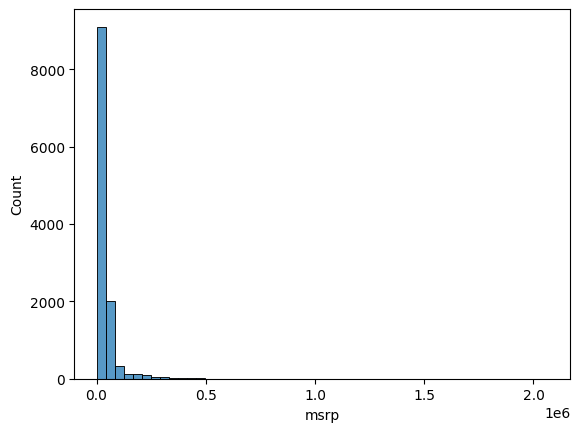

In [23]:
sns.histplot(df.msrp, bins = 50)

Most of the cars are cheap but there are few cars that are very expensive. These kind of skewed distribution are called `long tail distribution`

<Axes: xlabel='msrp', ylabel='Count'>

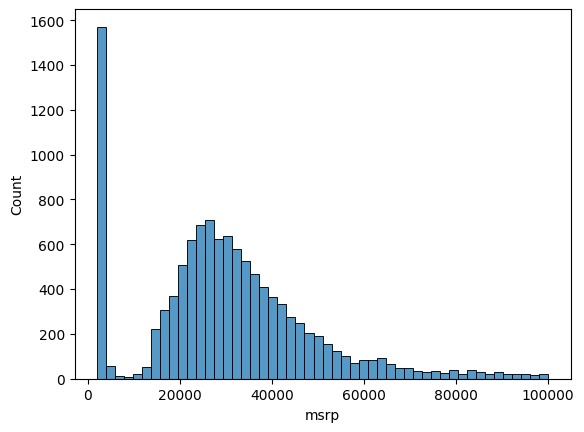

In [24]:
# let's zoom in
sns.histplot(df.msrp[df.msrp < 100000], bins =  50)

There is a bunch of cars with value of around 1000$, why is that so? maybe all cars less than 1000 are upper shifted to 1000$. Understanding questions like this are essential to understanding your data and ultimately your data

Okay, now we want to predict the msrp of a car (as the target variable ) from the input features but as we see the msrp of the car has a long tail distribution, we want to `normalise`it. To do so, we can log the distribution of msrp

In [25]:
np.log1p([0, 1, 10, 1000,100000]) #log1p adds 1 to 0 to prevent 

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

<Axes: xlabel='msrp', ylabel='Count'>

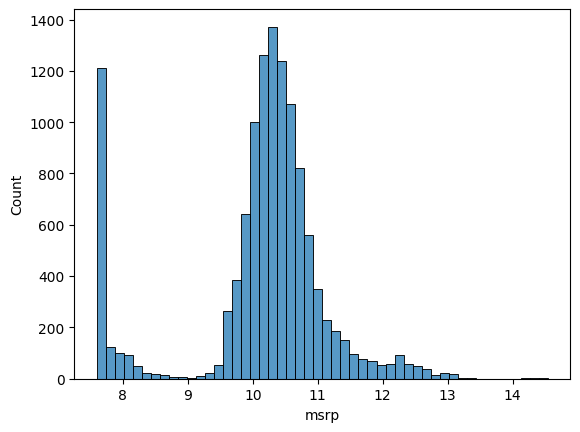

In [26]:
log_msrp = np.log1p(df.msrp)
sns.histplot(log_msrp, bins = 50) # the data in the model looks like a normalised distributions


IF your target variable is distribute normally (instead of long tail), your model does better at predicting. Why?

Treating Missing Values

In [27]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [28]:
total_nan = int(df.isnull().sum().sum())

We see from the information above of which columns contain NaN values that would need cleanign up.

## Section 3: Setting up the Validation Framework

The data that we have is split in to three parts, (training, validation, test) ~ (60%, 20%, 20%) where each part of the data yield the input feature matrix and the target label vector and so on

In [29]:
# TO recall,
n = len(df)
n_train = int(n* 0.6)
n_val = int(n * 0.2 )
n_test = int(n* 0.2)

print(f'we have total of {n} data samples')
print(f'From this, we remove {total_nan} data sample which have Nan entries')

print(f'The size of training set will be {n_train}')
print(f'The size of the val and test set will be {n_val}')

we have total of 11914 data samples
From this, we remove 3850 data sample which have Nan entries
The size of training set will be 7148
The size of the val and test set will be 2382


In [30]:
df.iloc[:2]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650


In [31]:
df.loc[:2]


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350


To cut the data up, we need to shuffle the data samples up, we can do this by shuffling the indices and then iterating over the data frame to get that, 
let's build a custom function up that does that and provides us with train, val, and test data frames

In [32]:
def shuffle_datasets(df, ntrain, nval, ntest, seed = 42):
    np.random.seed(seed)
    indices = np.arange(0, len(df))
    #shuffle the indices up 
    np.random.shuffle(indices)
    train_df = df.iloc[indices[:ntrain+1]]
    val_df = df.iloc[indices[ntrain+1: ntrain + nval + 1]]
    test_df = df.iloc[indices[ntrain+nval+1:]]
    return train_df, val_df, test_df

In [33]:
train, val, test = shuffle_datasets(df, n_train, n_val, n_test, seed =2)


In [34]:
train.head(10)


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
8001,volkswagen,rabbit,2008,regular_unleaded,170.0,5.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,29,22,873,17575
2882,bentley,continental_gtc,2013,premium_unleaded_(required),500.0,8.0,automatic,all_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,24,14,520,191400
649,bmw,6_series,2015,premium_unleaded_(required),315.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,coupe,32,21,3916,76100
616,maybach,57,2012,premium_unleaded_(required),543.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury",large,sedan,16,10,67,379050
4459,ford,f-150_heritage,2004,regular_unleaded,202.0,6.0,manual,four_wheel_drive,2.0,NaN,large,regular_cab_pickup,18,13,5657,26030


In [35]:
len(train), len(val), len(test)

(7149, 2382, 2383)

we need to drop the indices these subdata frames carry


In [36]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
val = val.reset_index(drop=True)


In [37]:
train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


Ok, now that we have our parts of data in order, let's try to get them sorted so that we can train, validate and test them.


In [38]:
def get_target(some_df):
    y_target = some_df.msrp.values
    y_target = np.log1p(y_target) # we are taking the log of the price
    return y_target

In [39]:
y_train = get_target(train)
y_val = get_target(val)
y_test = get_target(test)

In [40]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.28247178,
       10.45380308, 12.62248099], shape=(7149,))

## Section 4: Linear Regression

In [41]:
# Now we can implement linear regression
# simple/sample regression

w0 = 0
w = [1, 2, 3]

def linear_regression(x):
    return w0 + sum(wi * xi for wi, xi in zip(w, x))

#alternatively
def linear_regression_1(x):
    padded_weights = [w0] + w
    padded_x = [1] + x
    return sum(wi*xi for wi, xi in zip(padded_weights, padded_x))

print(linear_regression([2,3,4]))
print(linear_regression_1([2,3,4]))

20
20


Ok, we have a simple code that takes in a feature vector and gives us a target value(scaler), how then do we modify it to operate with X (data matrix) and y (target vector) 
In general, the regression is something like $$ g(x) = \sum_{i = 0}^{n+1}{w_i * x_i} $$ which is nothing but a dot product of w and v vector or said more carefully, dot product between x and w.



In [42]:
w0 = 0
w = [ 2, 3]
w = np.array([w0]+ w)

def linear_regression_2(X):
    #X is a data matrix or vector

    return X.dot(w)

#Test

X = np.array([
    [1,2,3],
    [1,3,4]
])

print(linear_regression_2(X))

[13 18]


Okay, now we have functions that computes the linear sum of the weights with the input feature values but how do we decide what weights to choose the optimal weights

## Section 5: Training Linear Regression: Normal Equation

So we have a matrix equation like this $$ Xw = y $$ where we are trying to find the w vector that best satisfies this relation.
Doing Matrix math, we can have: Xw = y -> X^-1 Xw = X^-1 y and if X has an inverse, (which requires X to be a square matrix). But most of the time, the data matrix is not square so we approximate it by doing the following steps: 
Xw = y -> xTXw = XTy where XTX is caled the gram matrix.


In [43]:
def normal_equation(X, y):
    #W is a data matrix
    #w is the weights vector
    #y is the target vector
    # X.dot(w) = y
    gram_matrix = X.T @ X
    w = np.linalg.inv(gram_matrix) @ (X.T.dot(y))
    return w


    

In [44]:
X = np.random.rand(20,4)

In [45]:
X *= 100
X

array([[34.27746539, 34.98161081, 42.18902535, 52.12288322],
       [49.35895597, 73.13251085, 15.87090088, 53.20337202],
       [12.32670752, 20.94315434, 29.90598229, 12.4399323 ],
       [68.7551256 ,  1.27986438, 28.64012401, 58.00547855],
       [97.3501257 , 78.1331216 , 57.43706802, 77.40908199],
       [42.52458549, 26.36139289, 82.31993173, 27.33734247],
       [ 0.52427544, 52.13965012, 91.30146643, 19.98167997],
       [57.96553877, 10.05667669, 34.71808389, 44.85543354],
       [79.11598573, 85.42307818, 90.00026723, 48.54376719],
       [29.18893663, 90.10471535, 58.38806967, 20.78534422],
       [62.62899638, 59.77123337, 42.85511755, 91.20244115],
       [96.59011517, 86.4738095 , 47.94013358, 40.42730722],
       [81.20312122,  2.3394231 , 33.85756433,  4.61096012],
       [91.78919557,  8.30738907, 93.8524292 , 44.50425173],
       [50.6757471 , 97.69423405, 50.37129893, 47.54679916],
       [63.51015269, 88.27576678, 17.34076572,  4.09427132],
       [92.04088737, 92.

In [46]:
ones = np.ones(X.shape[0])
X = np.column_stack([ones, X])
print(X)

[[ 1.         34.27746539 34.98161081 42.18902535 52.12288322]
 [ 1.         49.35895597 73.13251085 15.87090088 53.20337202]
 [ 1.         12.32670752 20.94315434 29.90598229 12.4399323 ]
 [ 1.         68.7551256   1.27986438 28.64012401 58.00547855]
 [ 1.         97.3501257  78.1331216  57.43706802 77.40908199]
 [ 1.         42.52458549 26.36139289 82.31993173 27.33734247]
 [ 1.          0.52427544 52.13965012 91.30146643 19.98167997]
 [ 1.         57.96553877 10.05667669 34.71808389 44.85543354]
 [ 1.         79.11598573 85.42307818 90.00026723 48.54376719]
 [ 1.         29.18893663 90.10471535 58.38806967 20.78534422]
 [ 1.         62.62899638 59.77123337 42.85511755 91.20244115]
 [ 1.         96.59011517 86.4738095  47.94013358 40.42730722]
 [ 1.         81.20312122  2.3394231  33.85756433  4.61096012]
 [ 1.         91.78919557  8.30738907 93.8524292  44.50425173]
 [ 1.         50.6757471  97.69423405 50.37129893 47.54679916]
 [ 1.         63.51015269 88.27576678 17.34076572  4.09

In [47]:
y = np.random.rand(20)

In [48]:
y

array([0.16983467, 0.86468841, 0.31800519, 0.86106452, 0.75046378,
       0.38745326, 0.9157508 , 0.640628  , 0.56113608, 0.10610433,
       0.86350954, 0.78004008, 0.33177285, 0.24236473, 0.86788951,
       0.83046069, 0.0490691 , 0.74155932, 0.61911309, 0.15331215])

In [49]:
w_approx = normal_equation(X, y)

In [50]:
w_approx

array([ 0.46436752, -0.00108322,  0.00163859, -0.00104987,  0.00250556])

## Section 6: Car Price Baseline Model 

Okay, now we can use the structures that we have created above to built a baseline model to predict the car prices

In [51]:
train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [52]:
# recall
df.dtypes
#focus on the ones are obviously important for the price


make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [53]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
print(base)

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']


In [54]:
train[base].head()

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657


In [55]:
train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [56]:
# to get the data matrix
X = train[base].dropna().values #dropna drops the values
print(X)
Xprime = train[base].fillna(0).values#fillna fills the inptted value to the na spots
print(Xprime)

[[ 148.    4.   33.   24. 1385.]
 [ 132.    4.   32.   25. 2031.]
 [ 148.    4.   37.   28.  640.]
 ...
 [ 210.    4.   30.   24.  873.]
 [ 285.    6.   22.   17.  549.]
 [ 563.   12.   21.   13.   86.]]
[[ 148.    4.   33.   24. 1385.]
 [ 132.    4.   32.   25. 2031.]
 [ 148.    4.   37.   28.  640.]
 ...
 [ 210.    4.   30.   24.  873.]
 [ 285.    6.   22.   17.  549.]
 [ 563.   12.   21.   13.   86.]]


In [57]:
def prepare_data_matrix(some_df, features_list):
    X = some_df[features_list].fillna(0).values
    ones = np.ones(X.shape[0]) #no of data samples
    X = np.column_stack([ones, X]) #the col of one followed by the data
    return X

X_train = prepare_data_matrix(train, base)
X_val = prepare_data_matrix(val, base)
X_test =  prepare_data_matrix(test, base)

print(X_val)




[[1.000e+00 2.000e+02 4.000e+00 3.100e+01 2.200e+01 8.730e+02]
 [1.000e+00 2.000e+02 4.000e+00 2.500e+01 1.900e+01 1.385e+03]
 [1.000e+00 2.410e+02 4.000e+00 2.900e+01 2.200e+01 6.170e+02]
 ...
 [1.000e+00 4.440e+02 8.000e+00 2.000e+01 1.300e+01 2.380e+02]
 [1.000e+00 3.320e+02 8.000e+00 2.300e+01 2.000e+01 1.624e+03]
 [1.000e+00 1.480e+02 4.000e+00 3.400e+01 2.400e+01 4.360e+02]]


In [58]:
#let's train the model

def train_model(X, y, method = 'normal'):
    if method == 'normal':
        w = normal_equation(X, y)
        return w
    
w_fitted = train_model(X_train, y_train)

In [59]:
w_fitted

array([ 7.92684645e+00,  9.70542815e-03, -1.59035023e-01,  1.43753823e-02,
        1.49509497e-02, -9.04762134e-06])

<Axes: ylabel='Count'>

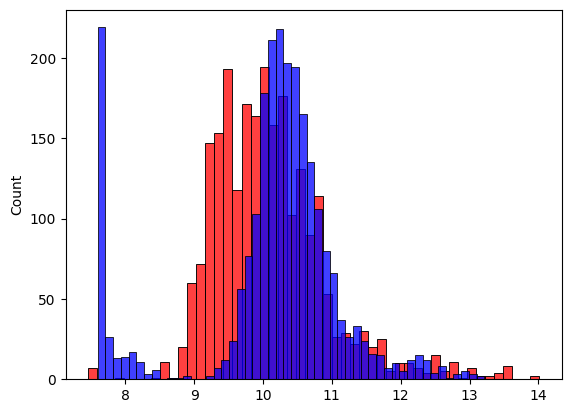

In [60]:
# recall our linear_regression function
# let's define it again here
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def linear_regression(X, w):
    return X.dot(w)

y_hat = linear_regression(X_val, w_fitted)

sns.histplot(y_hat, color = 'red', bins = 50)
sns.histplot(y_val, color = 'blue', bins = 50)

The predictions are not ideal and it seems to be mispredicting quite frequently. We want a way to quanity how badly our model is doing.
For that, we use RMSE


## Section 7: Root Mean Squared Error

In [61]:
def MSE(trues, preds):
    assert len(trues) == len(preds)
    SE = (preds - trues) **2
    return SE.mean()

def MAE(trues, preds):
    assert len(trues) ==  len(preds)
    AE = np.abs(preds - trues)
    return AE.mean()

    
def RMSE(trues, preds):
    mse = MSE(trues, preds)
    return np.sqrt(mse)

## Section 8: Validating the Model

In [62]:
X_val = X_val
y_val = y_val
y_hat_val = y_hat
rmse = RMSE(y_val, y_hat_val)
print(f'The current w vector is {w_fitted}.')
print(f'The root mean squared error for validation set is {rmse}.')

X_test = X_test
y_test = y_test
y_hat_test = linear_regression(X_test, w_fitted)
rmse = RMSE(y_test, y_hat_test)
print(f' The root mean square error for test set is {rmse}')

The current w vector is [ 7.92684645e+00  9.70542815e-03 -1.59035023e-01  1.43753823e-02
  1.49509497e-02 -9.04762134e-06].
The root mean squared error for validation set is 0.7617233451178443.
 The root mean square error for test set is 0.7357740935620382


## Section 9: Simple Feature Engineering

In [64]:
train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [65]:
train.year.max()

np.int64(2017)

In [67]:
#how old the cars are
2017 - train.year

0        9
1        5
2        1
3       26
4        0
        ..
7144     7
7145     2
7146     2
7147     2
7148     3
Name: year, Length: 7149, dtype: int64

In [ ]:
def prepare_X(df, features):
    df = df.copy()
    df['age'] = 2017 - df.year
    features += ['age']
    X = df[features].fillna(0).values
    ones = np.ones(X.shape[0]) #no of data samples
    X = np.column_stack([ones, X])
    return X

X_train = prepare_X(train, base)
y_train = y_train
w_fitted = train_model(X_train, y_train)

X_val = prepare_X(val, base)
y_val = y_val
y_val_hat =linear_regression(X_val, w_fitted)
print(f'The new rmse is {RMSE(y_val, y_val_hat)}')

LinAlgError: Singular matrix

In [69]:
print(base)

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']


## Section 10 : Categorical Variable

In [74]:
train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [75]:
df.number_of_doors

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
11909    4.0
11910    4.0
11911    4.0
11912    4.0
11913    4.0
Name: number_of_doors, Length: 11914, dtype: float64

In [78]:
df.number_of_doors.unique()


array([ 2.,  4.,  3., nan])

In [82]:
# turns boolean values into integers
for v in [2, 3, 4]:
    train['num_doors_%s' % v] = (train.number_of_doors == v).astype('int')



In [85]:
del train['num_doors_%s']

train.head()


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410,1,0,0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685,0,0,1
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795,0,0,1
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000,0,1,0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260,0,0,1


In [86]:
def prepare_X(df, features):
    df = df.copy()
    df['age'] = 2017 - df.year
    features += ['age']
    # turns boolean values into integers
    for v in [2, 3, 4]:
        train['num_doors_%s' % v] = (train.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    X = df[features].fillna(0).values
    ones = np.ones(X.shape[0]) #no of data samples
    X = np.column_stack([ones, X])
    return X